In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import re
import sys
import string
import nltk
import warnings
warnings.filterwarnings("ignore")
from wordcloud import WordCloud
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfVectorizer
from nltk.tokenize import word_tokenize
from sklearn.linear_model import LogisticRegression
from nltk.corpus import stopwords
from sklearn.manifold import TSNE
from sklearn.utils import shuffle
from time import time
from sklearn.datasets import load_wine, load_digits
from sklearn.model_selection import GridSearchCV
from sklearn.cluster import KMeans
from sklearn.metrics import pairwise_distances_argmin
from PIL import Image

In [3]:
# https://www.kaggle.com/datasets/aklimarimi/qs-world-ranked-universities-20182022
qs_csv = pd.read_csv("/home/kali/Desktop/data1.csv")
print(qs_csv.columns)
print("Size:")
print(qs_csv.shape)
qs_csv.isnull().sum()
qs_csv = qs_csv.dropna() 
qs_csv.isnull().sum()

Index(['Year', 'Rank', 'Name', 'Point', 'City', 'Country'], dtype='object')
Size:
(5250, 6)


Year       0
Rank       0
Name       0
Point      0
City       0
Country    0
dtype: int64

In [4]:
#Task 1
qs_csv_float  = qs_csv.drop(columns=['City', 'Country'], axis=1).set_index('Name') #Only float left
x = qs_csv_float.drop(['Year'], axis=1)
y = qs_csv_float['Year']
scaler = StandardScaler()
qs_ss = scaler.fit_transform(x)
pca = PCA(n_components = 2)
pca_result = pca.fit_transform(qs_ss)
print (pca_result)

[[ 3.54772202  1.12578476]
 [ 3.27102072  0.86311885]
 [ 3.27102072  0.86311885]
 ...
 [-2.11492136  0.3334205 ]
 [-2.13063853  0.33173873]
 [-2.13063853  0.33173873]]


<AxesSubplot: xlabel='pca_1_column', ylabel='pca_2_column'>

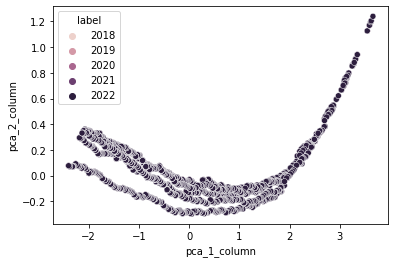

In [5]:
pca_result1 = pd.DataFrame({'pca_1_column': pca_result[:,0], 'pca_2_column': pca_result[:,1], 'label': y})
sns.scatterplot(x='pca_1_column', y='pca_2_column', hue='label', data=pca_result1)

In [6]:
tsne = TSNE(n_components=2)
tsne_result = tsne.fit_transform(qs_csv_float)
print (tsne_result)

[[-23.118963  68.43803 ]
 [-24.157532  65.52379 ]
 [-24.157532  65.52379 ]
 ...
 [ 88.24123   12.91778 ]
 [ 88.00683   13.867583]
 [ 88.00683   13.867583]]


<AxesSubplot: xlabel='tsne_1', ylabel='tsne_2'>

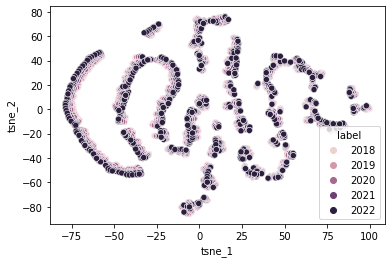

In [7]:
tsne_result1 = pd.DataFrame({'tsne_1': tsne_result[:,0], 'tsne_2': tsne_result[:,1], 'label': y})
sns.scatterplot(x='tsne_1', y='tsne_2', hue='label', data=tsne_result1)

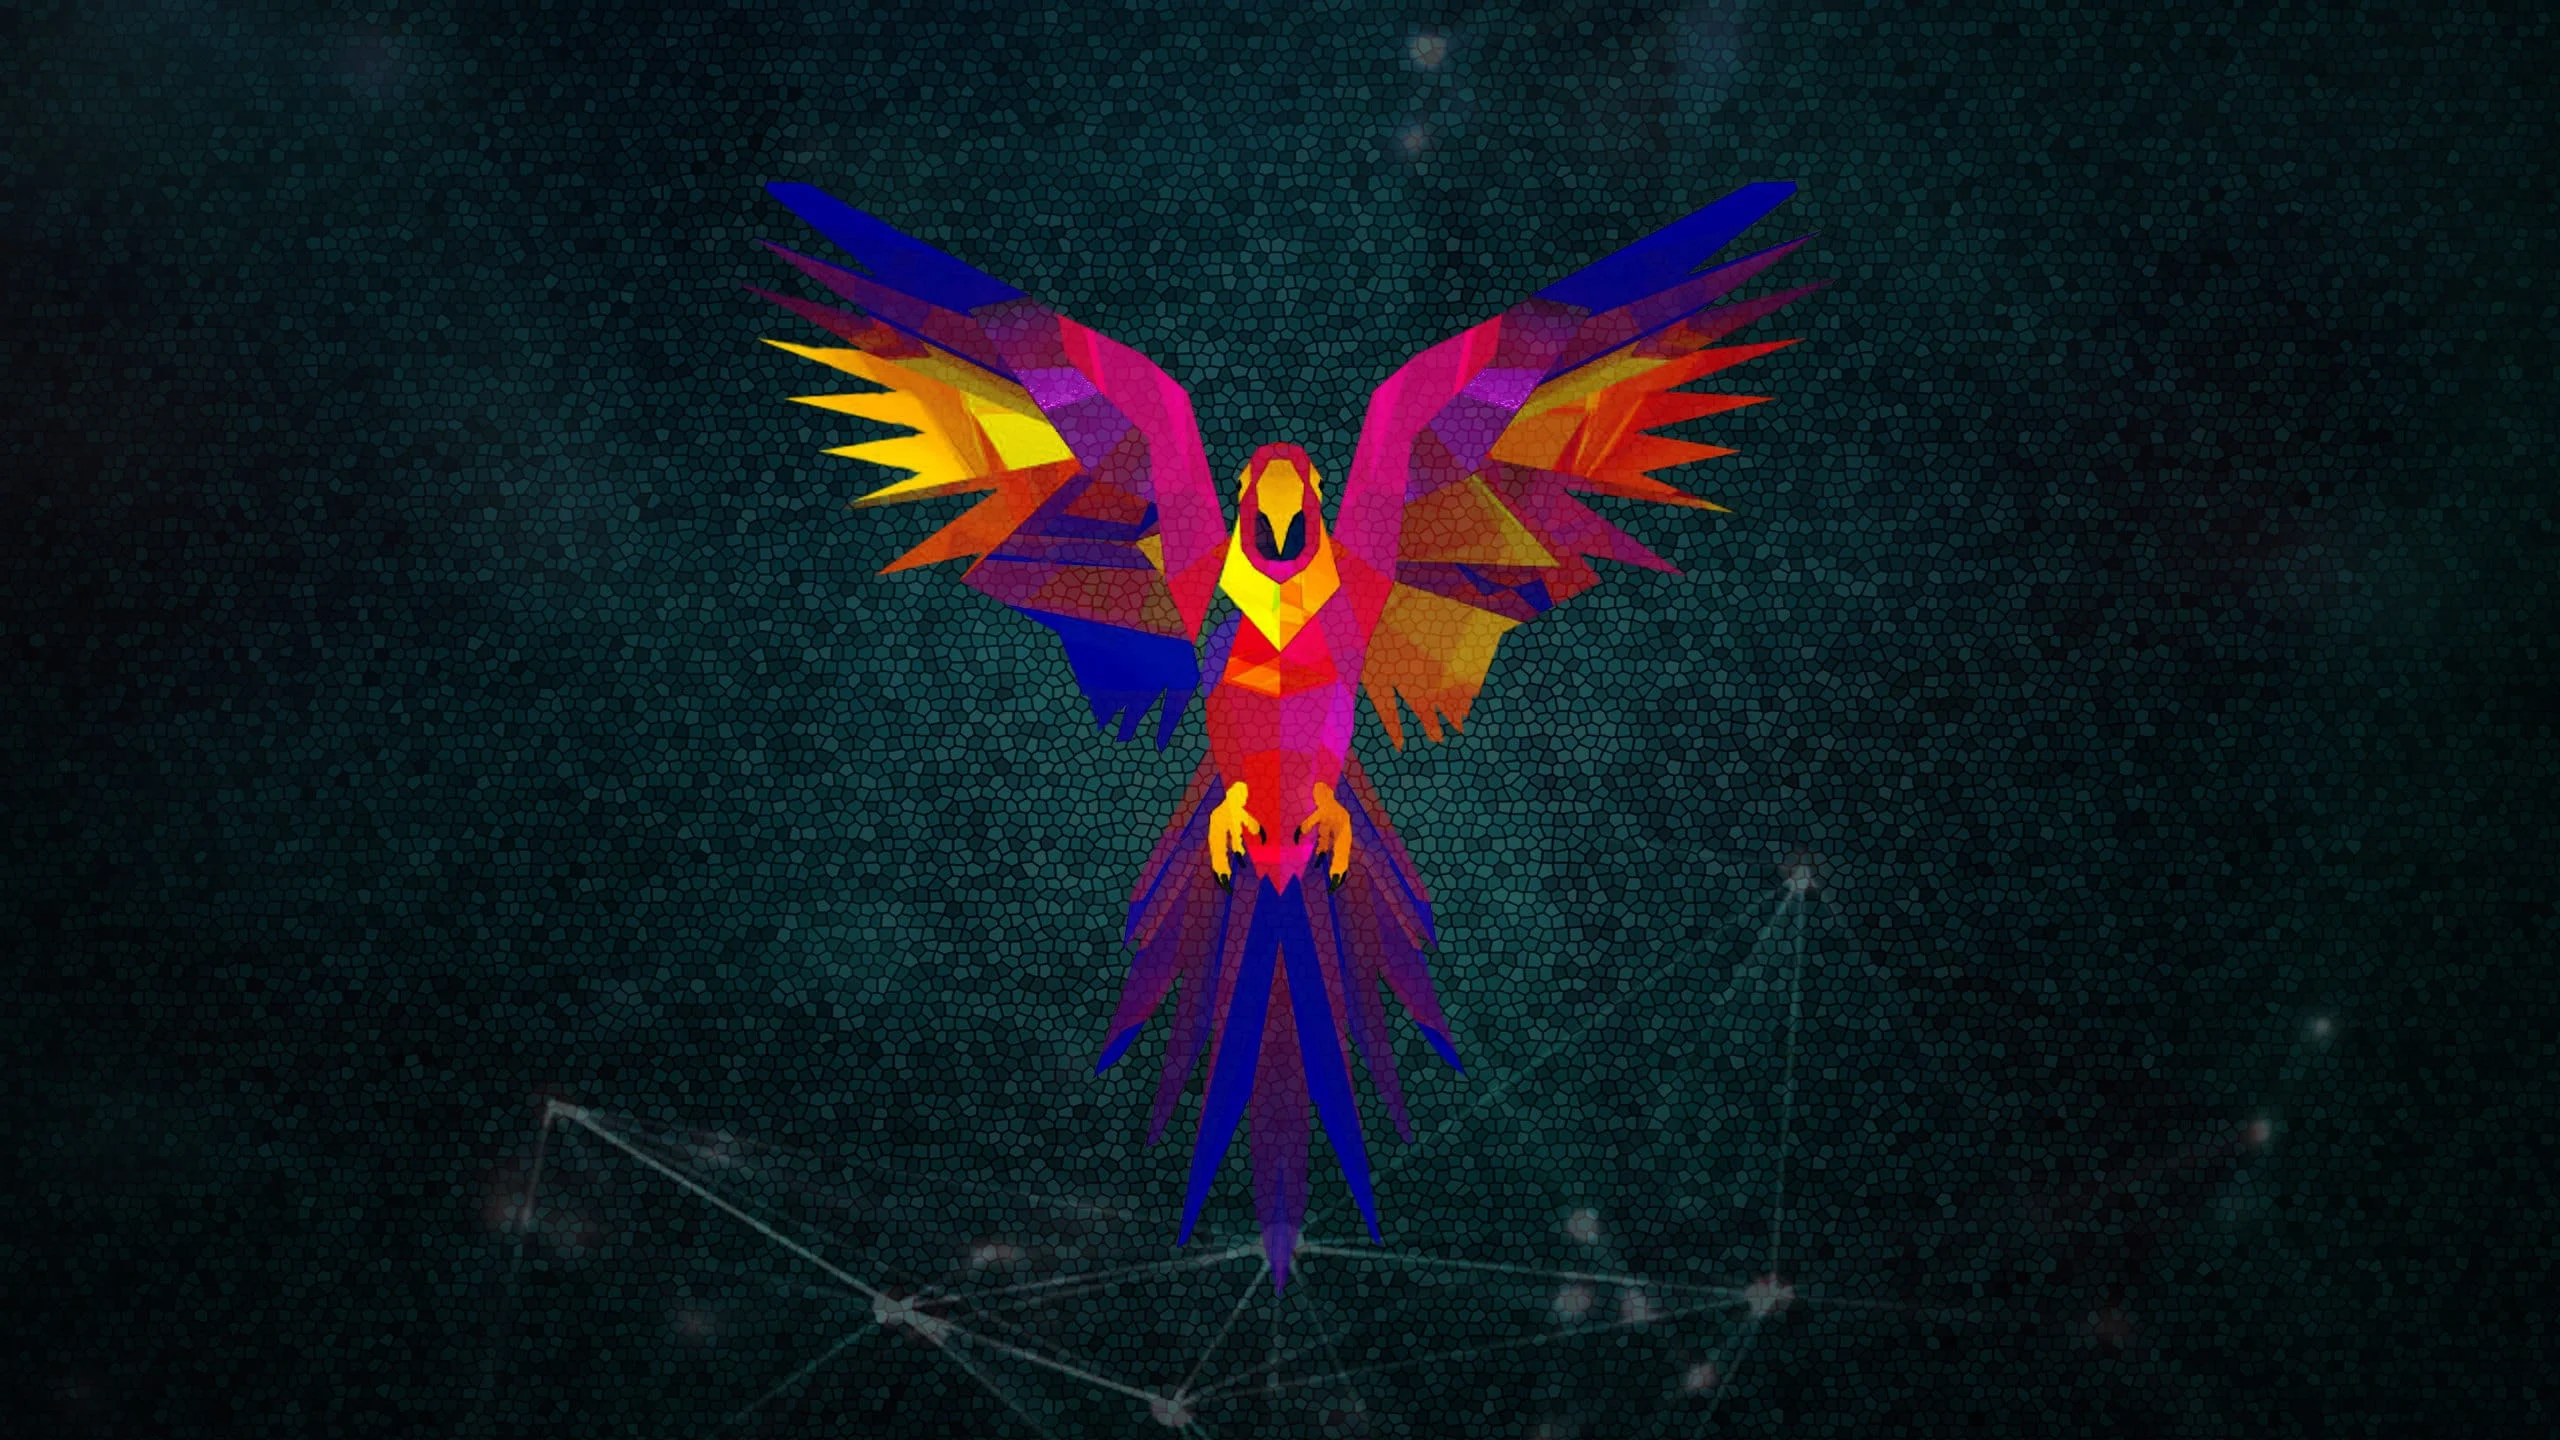

In [6]:
#task 2
n_colors = [64, 32, 16, 8]
image = Image.open("/home/kali/Desktop/parrot_os_image.webp")
image

In [7]:
image = np.array(image, dtype=np.float64) / 255
image

array([[[0.02745098, 0.11764706, 0.12156863],
        [0.02745098, 0.11764706, 0.12156863],
        [0.02745098, 0.11764706, 0.12156863],
        ...,
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667]],

       [[0.02745098, 0.11764706, 0.12156863],
        [0.02745098, 0.11764706, 0.12156863],
        [0.02745098, 0.11764706, 0.12156863],
        ...,
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667]],

       [[0.03529412, 0.11372549, 0.12156863],
        [0.03529412, 0.11372549, 0.12156863],
        [0.03529412, 0.11372549, 0.12156863],
        ...,
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667],
        [0.00784314, 0.05098039, 0.06666667]],

       ...,

       [[0.01568627, 0.02352941, 0.03921569],
        [0.01568627, 0.02352941, 0.03921569],
        [0.01568627, 0

In [8]:
w, h, d = original_shape = tuple(image.shape)
image_array = np.reshape(image, (w * h, d))
assert d == 3
t0 = time()
image_array_sample = shuffle(image_array, random_state=0, n_samples=1_000)

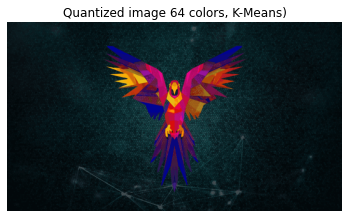

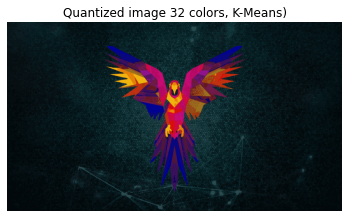

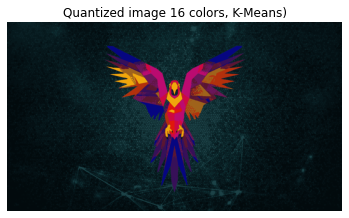

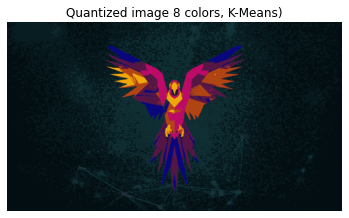

In [9]:
#Should check for each depth manually, or will get kernel error
#64
kmeans64 = KMeans(n_clusters=64, random_state=0).fit(image_array_sample)
kmeans32 = KMeans(n_clusters=32, random_state=0).fit(image_array_sample)
kmeans16 = KMeans(n_clusters=16, random_state=0).fit(image_array_sample)
kmeans8 = KMeans(n_clusters=8, random_state=0).fit(image_array_sample)
labels64 = kmeans64.predict(image_array)
labels32 = kmeans32.predict(image_array)
labels16 = kmeans16.predict(image_array)
labels8 = kmeans8.predict(image_array)
def recreate_image(codebook, labels, w, h):
    return codebook[labels].reshape(w, h, -1)
plt.figure(1)
plt.clf()
plt.axis("off")
plt.title("Quantized image 64 colors, K-Means)")
plt.imshow(recreate_image(kmeans64.cluster_centers_, labels64, w, h))
plt.figure(2)
plt.clf()
plt.axis("off")
plt.title("Quantized image 32 colors, K-Means)")
plt.imshow(recreate_image(kmeans32.cluster_centers_, labels32, w, h))
plt.figure(3)
plt.clf()
plt.axis("off")
plt.title("Quantized image 16 colors, K-Means)")
plt.imshow(recreate_image(kmeans16.cluster_centers_, labels16, w, h))
plt.figure(4)
plt.clf()
plt.axis("off")
plt.title("Quantized image 8 colors, K-Means)")
plt.imshow(recreate_image(kmeans8.cluster_centers_, labels8, w, h))

In [2]:
#task 3
text_data = pd.read_csv("/home/kali/Desktop/IMDB_Dataset.csv")
text_data = text_data.drop(labels=range(10000, 49999), axis=0)
text_data

review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
9996   Give me a break. How can anyone say that this ...  negative
9997   This movie is a bad movie. But after watching ...  negative
9998   This is a movie that was probably made to ente...  negative
9999   Smashing film about film-making. Shows the int...  positive
49999  No one expects the Star Trek movies to be high...  negative

[10001 rows x 2 columns]

In [3]:
from collections import Counter
Counter( text_data['sentiment'])

Counter({'positive': 5028, 'negative': 4973})

In [4]:
# cleaning
stop_words = stopwords.words('english')
filtered_text = []
for i in text_data["review"]:
    i = re.sub("\d", " ", i)
    i = re.sub('[%s]' % re.escape(string.punctuation), ' ', i)
    i = re.sub('\n', ' ', i)
    i = re.sub('\s{2,}', " ", i)
    i = re.sub("@\S+", " ", i)
    i = re.sub("https*\S+", " ", i)
    i = re.sub("#\S+", " ", i)
    i = re.sub("\d", " ", i)
    i = re.sub("https*\S+", " ", i)
    text_tokens = word_tokenize(i)
    for w in text_tokens:
        if w not in stop_words:
            filtered_text.append(w)

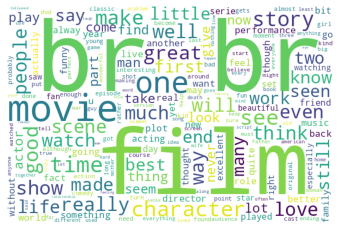

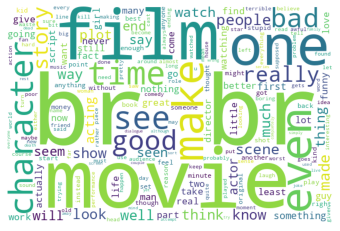

In [5]:
# vizualization
def visualize(label):
    text = ''
    for msg in text_data[text_data['sentiment'] == label]['review']:
        msg = msg.lower()
        text += msg + ' '
    wordcloud = WordCloud(width=600, height=400, background_color="white").generate(text)
    plt.imshow(wordcloud)
    plt.axis('off')
    plt.show()
visualize('positive')
visualize('negative')

In [6]:
# vectorization
x_train, x_test, y_train, y_test = train_test_split(text_data['review'], text_data['sentiment'], test_size=0.20)
tfidf_vectorizer = TfidfVectorizer(max_df=500, min_df=10)
tfidf_train = tfidf_vectorizer.fit_transform(x_train)
tfidf_test =  tfidf_vectorizer.transform(x_test)

In [7]:
#classification with LogisticRegression
classification = LogisticRegression().fit(tfidf_train, y_train)
predict = classification.predict(tfidf_test)
print(classification_report(y_test, predict))
print(confusion_matrix(y_test, predict))

              precision    recall  f1-score   support

    negative       0.88      0.82      0.85      1038
    positive       0.82      0.88      0.85       963

    accuracy                           0.85      2001
   macro avg       0.85      0.85      0.85      2001
weighted avg       0.85      0.85      0.85      2001

[[851 187]
 [116 847]]
